In [1]:
import pandas as pd
import numpy as np

In [2]:
injury_record = pd.read_csv('InjuryRecord.csv')
player_track_data = pd.read_csv('PlayerTrackData.csv')
play_list = pd.read_csv('PlayList.csv')

## Data Quality Check

The first thing we need to do is examine the data for each table to understand what we're working with and check for missing values, outliers, etc. Below are provided each database, their respective data and how they relate to one another.


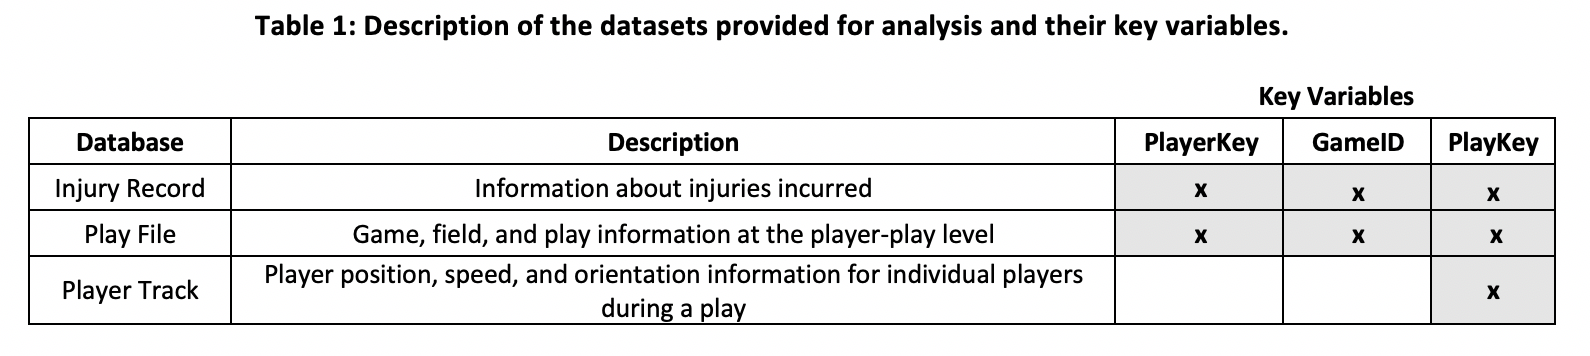

## Injury Data File

The first table that we'll dive into is the injury data file - which contains information on 105 lower-limb injuries that occurred during the regular season games over the course of two seasons. 

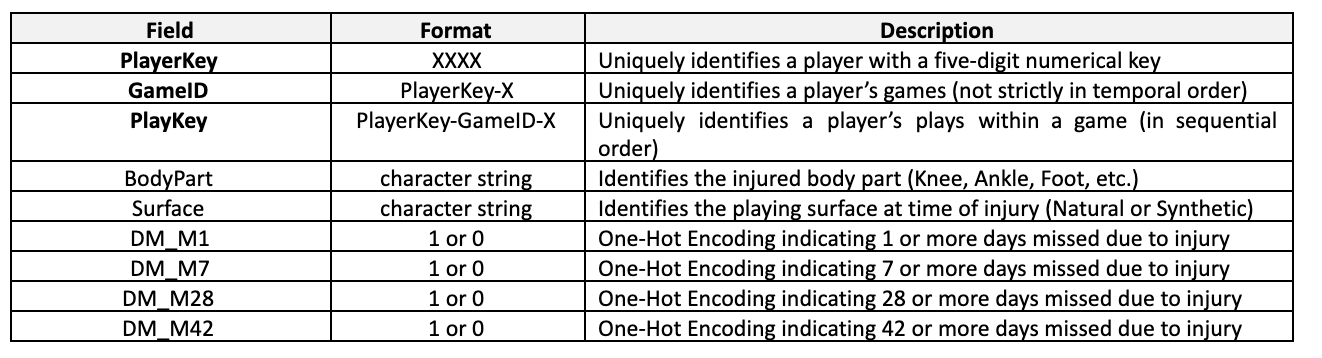

In [3]:
#Reading injury_record table
injury_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PlayerKey  105 non-null    int64 
 1   GameID     105 non-null    object
 2   PlayKey    77 non-null     object
 3   BodyPart   105 non-null    object
 4   Surface    105 non-null    object
 5   DM_M1      105 non-null    int64 
 6   DM_M7      105 non-null    int64 
 7   DM_M28     105 non-null    int64 
 8   DM_M42     105 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.5+ KB


In [4]:
injury_record.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [5]:
#Displaying rows where Playkey is NA
injury_record[injury_record['PlayKey'].isna() == True]

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
46,33337,33337-2,NaN,Foot,Natural,1,1,1,1
47,45099,45099-5,NaN,Knee,Natural,1,1,1,1
48,36591,36591-9,NaN,Knee,Natural,1,1,1,1
49,45950,45950-6,NaN,Toes,Synthetic,1,1,0,0
50,39653,39653-4,NaN,Ankle,Synthetic,1,0,0,0
51,38253,38253-10,NaN,Toes,Synthetic,1,1,1,0
52,38214,38214-12,NaN,Toes,Synthetic,1,0,0,0
53,43119,43119-12,NaN,Ankle,Synthetic,1,0,0,0
54,35648,35648-12,NaN,Ankle,Natural,1,0,0,0
55,40051,40051-13,NaN,Ankle,Natural,1,0,0,0


In [6]:
injury_record['BodyPart'].value_counts()

Knee     48
Ankle    42
Foot      7
Toes      7
Heel      1
Name: BodyPart, dtype: int64

In [7]:
injury_record['Surface'].value_counts()

Synthetic    57
Natural      48
Name: Surface, dtype: int64

We can see from inspecting that data that this dataset is mostly whole. The only rows with NA values are those with missing PlayKey values. This indicates that the game where the injury occurred is known, but the specific play was is unknown. When looking at the injury values that may differ, it seems like this portion has no typos or mistakes in the labeling. 

## Play List

The play file has information about each players' play in the dataset and more details like position, stadium type, field type etc. 

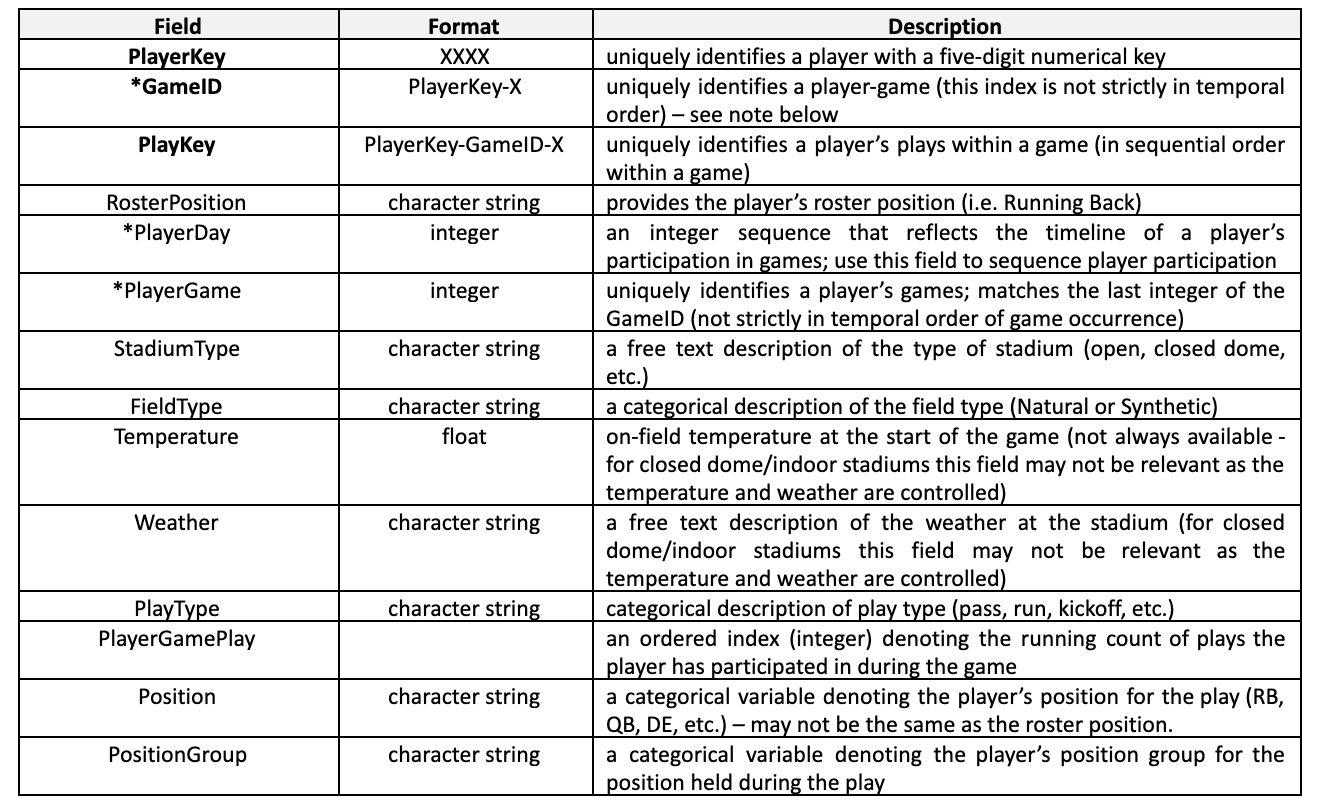

In [8]:
play_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267005 entries, 0 to 267004
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PlayerKey       267005 non-null  int64 
 1   GameID          267005 non-null  object
 2   PlayKey         267005 non-null  object
 3   RosterPosition  267005 non-null  object
 4   PlayerDay       267005 non-null  int64 
 5   PlayerGame      267005 non-null  int64 
 6   StadiumType     250095 non-null  object
 7   FieldType       267005 non-null  object
 8   Temperature     267005 non-null  int64 
 9   Weather         248314 non-null  object
 10  PlayType        266638 non-null  object
 11  PlayerGamePlay  267005 non-null  int64 
 12  Position        267005 non-null  object
 13  PositionGroup   267005 non-null  object
dtypes: int64(5), object(9)
memory usage: 28.5+ MB


In [9]:
play_list.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [10]:
play_list['RosterPosition'].value_counts()

Linebacker           50129
Offensive Lineman    47413
Wide Receiver        43391
Safety               39387
Defensive Lineman    30588
Cornerback           28987
Running Back         11664
Tight End             7752
Quarterback           6986
Kicker                 708
Name: RosterPosition, dtype: int64

In [11]:
play_list['StadiumType'].value_counts()

Outdoor                   145032
Outdoors                   32956
Indoors                    22805
Dome                        9376
Retractable Roof            8914
Indoor                      6892
Open                        4124
Domed, closed               3076
Retr. Roof - Closed         2235
Retr. Roof-Closed           2015
Domed, open                 1779
Dome, closed                1059
Closed Dome                 1011
Domed                        985
Oudoor                       914
Domed, Open                  807
Ourdoor                      778
Outdoor Retr Roof-Open       601
Outddors                     595
Indoor, Roof Closed          547
Retr. Roof-Open              486
Retr. Roof - Open            486
Indoor, Open Roof            479
Bowl                         465
Retr. Roof Closed            414
Heinz Field                  389
Outdor                       356
Outside                      341
Cloudy                       178
Name: StadiumType, dtype: int64

In [12]:
play_list['FieldType'].value_counts()

Natural      156902
Synthetic    110103
Name: FieldType, dtype: int64

In [13]:
play_list['Weather'].value_counts()

Cloudy                                                                              60705
Sunny                                                                               51728
Partly Cloudy                                                                       28463
Clear                                                                               25923
Mostly Cloudy                                                                       11176
                                                                                    ...  
30% Chance of Rain                                                                    354
Partly Clouidy                                                                        302
Coudy                                                                                 278
Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.      246
Party Cloudy                                                                          230
Name: Weat

In [14]:
play_list['Weather'].unique()

array(['Clear and warm', 'Mostly Cloudy', 'Sunny', 'Clear', 'Cloudy',
       'Cloudy, fog started developing in 2nd quarter', 'Rain',
       'Partly Cloudy', 'Mostly cloudy', 'Cloudy and cold',
       'Cloudy and Cool', 'Rain Chance 40%', 'Controlled Climate',
       'Sunny and warm', 'Partly cloudy', 'Clear and Cool',
       'Clear and cold', 'Sunny and cold', 'Indoor', nan, 'Partly Sunny',
       'N/A (Indoors)', 'Mostly Sunny', 'Indoors', 'Clear Skies',
       'Partly sunny', 'Showers', 'N/A Indoor', 'Sunny and clear', 'Snow',
       'Scattered Showers', 'Party Cloudy', 'Clear skies',
       'Rain likely, temps in low 40s.', 'Hazy', 'Partly Clouidy',
       'Sunny Skies', 'Overcast', 'Cloudy, 50% change of rain', 'Fair',
       'Light Rain', 'Partly clear', 'Mostly Coudy', '10% Chance of Rain',
       'Cloudy, chance of rain', 'Heat Index 95',
       'Sunny, highs to upper 80s', 'Sun & clouds',
       'Heavy lake effect snow', 'Mostly sunny', 'Cloudy, Rain',
       'Sunny, Windy', '

In [15]:
play_list['PlayType'].value_counts()

Pass                    138079
Rush                     92606
Extra Point               5906
Kickoff                   5754
Punt                      5746
Field Goal                4915
Kickoff Not Returned      4625
Punt Not Returned         3486
Kickoff Returned          2773
Punt Returned             2469
0                          279
Name: PlayType, dtype: int64

In [16]:
play_list['Position'].value_counts()

WR              43457
OLB             33524
CB              29584
FS              21373
G               17467
T               16979
SS              15660
DT              14119
DE              13800
C               12963
RB              11359
ILB              8359
TE               7749
QB               6969
MLB              5595
LB               2727
NT               2587
DB               1280
K                 538
S                 471
HB                230
P                 170
Missing Data       45
Name: Position, dtype: int64

In [17]:
play_list['PositionGroup'].value_counts()

DB              68295
LB              50954
OL              47409
WR              43387
DL              29830
RB              11659
TE               7749
QB               6969
SPEC              708
Missing Data       45
Name: PositionGroup, dtype: int64

I've displayed all categorical data to examine the possible values that the data can contain. I've noticed a lot of discrepancies between the spelling in the Stadium Type column which will ultimately skew our data unless the values are cleaned. I've also noted that there are 63 unique weather values which I will probably take a look at and try to normalize those as well. The other columns don't seem to be as messy. There are columns with missing values (StadiumType, Weather and PlayType). 

## Player Track

This table includes data about the players' position, direction, and orientation data collected from Next Gen Stats (NGS) and is indexed by PlayKey.

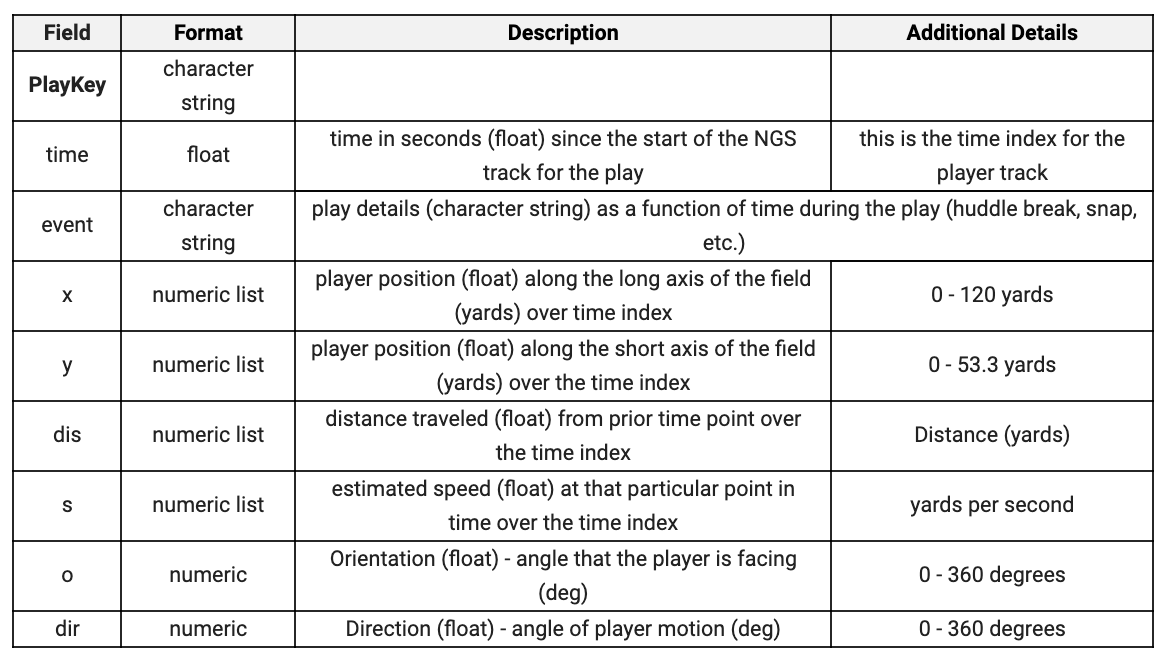

In [18]:
player_track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76366748 entries, 0 to 76366747
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   PlayKey  object 
 1   time     float64
 2   event    object 
 3   x        float64
 4   y        float64
 5   dir      float64
 6   dis      float64
 7   o        float64
 8   s        float64
dtypes: float64(7), object(2)
memory usage: 5.1+ GB


Using .info() does not show how many null values are in the player track table so I will create a table that displays this instead. 

In [19]:
player_track_data['o'].isna().value_counts()

False    76366746
True            2
Name: o, dtype: int64

In [20]:
player_track_data_cols = [column for column in player_track_data]
for column in player_track_data_cols:
    print(column)
    print(player_track_data[column].isna().value_counts())

PlayKey
False    76366748
Name: PlayKey, dtype: int64
time
False    76366748
Name: time, dtype: int64
event
True     74526875
False     1839873
Name: event, dtype: int64
x
False    76366748
Name: x, dtype: int64
y
False    76366748
Name: y, dtype: int64
dir
False    76366746
True            2
Name: dir, dtype: int64
dis
False    76366748
Name: dis, dtype: int64
o
False    76366746
True            2
Name: o, dtype: int64
s
False    76366748
Name: s, dtype: int64


We see from the output that the only column with a significant amount of null values is the event column. In any case - we just won't use this column. We can see that less than 2.5% actually has data in this column. 

In [21]:
player_track_data['event'].value_counts()

ball_snap               253271
line_set                247189
huddle_break_offense    175415
tackle                  149626
first_contact           140437
                         ...  
end_path                     8
extra_point_fake             5
xp_fake                      5
drop_kick                    5
play_submit\t                2
Name: event, Length: 80, dtype: int64

The kind of data in the event column is provided above. These are the types of plays. 

Upon examination, we can see that this dataset is extremely large (76 Million rows) and that the event column is mostly Null. In fact less than 2.5% of the data actually contains event data. In the future I will merge relevant data to see if this is actually useful. The other columns appear to be intact (with float values of course).

## Data Cleaning

The notable data cleaning steps are the following: 

1. Stadium Type - The labeling for PlayList.stadiumtype is inconsistent and needs to be normalized.
2. Weather - The labeling for Weather is all over the place and I will make reasonable adjustments 

### Stadium Type cleaning
I will consolidate these values into one of five buckets:
1. Outdoor
2. Indoor
3. Retr. Roof
4. Dome

In [22]:
play_list['StadiumType'].value_counts()

Outdoor                   145032
Outdoors                   32956
Indoors                    22805
Dome                        9376
Retractable Roof            8914
Indoor                      6892
Open                        4124
Domed, closed               3076
Retr. Roof - Closed         2235
Retr. Roof-Closed           2015
Domed, open                 1779
Dome, closed                1059
Closed Dome                 1011
Domed                        985
Oudoor                       914
Domed, Open                  807
Ourdoor                      778
Outdoor Retr Roof-Open       601
Outddors                     595
Indoor, Roof Closed          547
Retr. Roof-Open              486
Retr. Roof - Open            486
Indoor, Open Roof            479
Bowl                         465
Retr. Roof Closed            414
Heinz Field                  389
Outdor                       356
Outside                      341
Cloudy                       178
Name: StadiumType, dtype: int64

In [23]:
len(play_list['StadiumType'].unique())

30

We can see that the stadiumtype column has 30 unique values. For simplicity's sake, I will consolidate this column into 4 buckets - Outdoor, Indoor, Retractable Roof or Dome.

In [24]:
#The first step we will take is to consolidate all outdoor values to one.

outdoor_list = ['Outdoors', 'Oudoor', 'Ourdoor', 'Outddors', 'Outdor', 
                'Outside', 'Heinz Field', 'Cloudy', 'Bowl', 'Open', 'Outdoor']

indoor_list = ['Indoors', 'Indoor']

retr_roof = ['Retractable Roof', 'Retr. Roof - Closed', 'Retr. Roof-Closed', 'Indoor, Roof Closed', 
             ' Retr. Roof-Open', 'Retr, Roof - Open', 'Indoor, Open Roof','Indoor, Open Roof', 'Retr. Roof Closed']

dome = ['Dome', 'Domed, closed', 'Domed, open', 'Dome, closed', 'Closed Dome', 'Domed', 'Domed, Open']

In [25]:
def stadiumtype_clean(stadium: str):
    """
    This function returns the type of stadium based on it's value. 
    """
    result = None
    # Initially checking if the value is NaN
    if pd.isna(stadium):
        result = stadium
    # If the value is not NaN and is in one of these lists, the value is returned as one of these strings.
    if not pd.isna(stadium):
        if stadium in outdoor_list:
            result = 'Outdoor'
        if stadium in indoor_list:
            result = 'Indoor'
        if stadium in retr_roof:
            result = 'Retractable Roof'
        if stadium in dome:
            result = 'Dome'
            
    return result

In [26]:
#This block of code is setting up a blank list and overwriting the values of stadiumtype with the cleaned values
cleaned_stadium = []

for row in play_list['StadiumType']:
    cleaned_stadium.append(stadiumtype_clean(row))

play_list['StadiumType'] = cleaned_stadium

play_list['StadiumType'].value_counts()

Outdoor             186128
Indoor               29697
Dome                 18093
Retractable Roof     14604
Name: StadiumType, dtype: int64

Now that we have a cleaned consolidated stadiumtype column, we can move onto cleaning the weather column.

### Weather Cleaning

In [27]:
#Displaying weather values for better readability
weather_values = play_list['Weather'].unique()
cleaned_weather_values = [x.capitalize() for x in weather_values if not pd.isna(x)]
cleaned_weather_values.sort()
print(*cleaned_weather_values, sep = '\n')

10% chance of rain
30% chance of rain
Clear
Clear and cold
Clear and cool
Clear and sunny
Clear and sunny
Clear and warm
Clear skies
Clear skies
Clear to partly cloudy
Cloudy
Cloudy
Cloudy and cold
Cloudy and cool
Cloudy with periods of rain, thunder possible. winds shifting to wnw, 10-20 mph.
Cloudy, 50% change of rain
Cloudy, chance of rain
Cloudy, fog started developing in 2nd quarter
Cloudy, light snow accumulating 1-3"
Cloudy, rain
Cold
Controlled climate
Coudy
Fair
Hazy
Heat index 95
Heavy lake effect snow
Indoor
Indoors
Light rain
Mostly cloudy
Mostly cloudy
Mostly coudy
Mostly sunny
Mostly sunny
Mostly sunny skies
N/a (indoors)
N/a indoor
Overcast
Partly clear
Partly cloudy
Partly cloudy
Partly clouidy
Partly sunny
Partly sunny
Party cloudy
Rain
Rain chance 40%
Rain likely, temps in low 40s.
Rain shower
Rainy
Scattered showers
Showers
Snow
Sun & clouds
Sunny
Sunny and clear
Sunny and cold
Sunny and warm
Sunny skies
Sunny, highs to upper 80s
Sunny, windy


In [28]:
play_list['Weather'].isna().value_counts()

False    248314
True      18691
Name: Weather, dtype: int64

Displaying the initial Null value counts for future reference:
1. We have 248314 non-null values
2. We have 18691 null values

In [29]:
play_list['Weather'] = play_list['Weather'].str.capitalize()

Since we don't have data on the exact weather conditions like how much rainfall, or snowfall we can make several broad categories. I can only generalize the weather with the data we're working with.

Given these conditions, I will consolidate these into several buckets:

1. Rain (Low to Mid)
2. Clear
3. Cloudy
4. Cold
5. Indoor
6. Hot
7. Showers
8. Snow
9. Sunny

In [30]:
#Manually inputting the unique weather values
rain_list = ['10% chance of rain', '30% chance of rain', 'Rain', 'Rain chance 40%', 
             'Rain likely, temps in low 40s.', 'Light rain','Cloudy, 50% change of rain', 'Cloudy, chance of rain',
             'Cloudy, rain', 'Cloudy with periods of rain, thunder possible. winds shifting to wnw, 10-20 mph.',
             'Rainy']

clear_list = ['Clear', 'Clear and cold', 'Clear and cool', 'Clear and sunny', 'Clear and sunny', 
              'Clear and warm', 'Clear skies', 'Clear skies', 'Clear to partly cloudy', 'Partly clear']

cloudy_list = ['Cloudy','Coudy', 'Cloudy and cold', 'Cloudy and cool', 
               'Cloudy, fog started developing in 2nd quarter', 'Cloudy, light snow accumulating 1-3"', 
               'Overcast', 'Partly cloudy', 'Partly clouidy', 'Hazy', 'Mostly cloudy', 'Party cloudy',
               'Mostly coudy']

hot_list = ['Heat index 95']

cold_list = ['Cold']

indoor_list = ['Controlled climate', 'Indoor', 'Indoors', 'N/a (indoors)', 'N/a indoor', 'N/a (indoors)']

sunny_list = ['Partly sunny', 'Sun & clouds', 'Sunny', 'Sunny and clear', 
              'Sunny and cold', 'Sunny and warm', 'Sunny skies',
              'Sunny, highs to upper 80s', 'Sunny, windy', 'Fair', 'Mostly sunny', 'Mostly sunny skies']

showers_list = ['Rain shower', 'Scattered showers', 'Showers']

snow_list = ['Snow', 'Heavy lake effect snow']

In [31]:
def weather_clean(weather: str):
    """
    This function returns the type of Weather based on it's value. 
    """
    result = None
    # Initially checking if the value is NaN
    if pd.isna(weather):
        result = weather
    # If the value is not NaN and is in one of these dictionaries, the value is returned as one of these strings.
    if not pd.isna(weather):
        for key in weather_dict.keys():
            if weather in weather_dict[key]:
                result = key

    return result

In [32]:
#Creating a dictionary to better organize each of the weather lists
weather_dict = {'Rain': rain_list, 'Clear' : clear_list, 'Cloudy': cloudy_list, 
                'Hot': hot_list, 'Cold': cold_list,'Indoor': indoor_list, 
                'Sunny': sunny_list, 'Showers': showers_list, 'Snow': snow_list}

In [33]:
#This block of code is setting up a blank list and overwriting the values of weather with the cleaned values
cleaned_weather = []

for row in play_list['Weather']:
    cleaned_weather.append(weather_clean(row))

play_list['Weather'] = cleaned_weather

play_list['Weather'].value_counts()

Cloudy     111312
Sunny       65662
Clear       32567
Indoor      20276
Rain        14569
Showers      1595
Snow         1329
Cold          549
Hot           455
Name: Weather, dtype: int64

In [34]:
#This loop will test for values that wouldn't have been updated. Mini unit test 
for value in cleaned_weather_values:
    weather_clean(value)
    if weather_clean(value) == None:
        print(value, ':' ,weather_clean(value))

We can see that the code worked and that there are no values that are missed. 

In [35]:
play_list['Weather'].isna().value_counts()

False    248314
True      18691
Name: Weather, dtype: int64

The null value counts also match the previous check:
1. 248314 non-null values
2. 18691 null values

Now that we have a cleaned dataset - We can export the final csv for the next step. The only dataset that needed to be cleaned was the Play List csv. 

In [36]:
play_list.to_csv('PlayList_clean.csv')